In [1]:
cd ..

C:\Users\Nghia\PycharmProjects\ECML\Refactor


In [2]:
from pprint import pprint

import numpy as np
import tensorflow as tf
import time
from collections import Counter

from load_datasets import mnist
from metrics import metrics
from models.AE1SVM import AEOneClassSVM

import matplotlib
import matplotlib.pyplot as plt

c:\users\nghia\anaconda2\envs\tf36\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


Extracting /tmp/data/train-images-idx3-ubyte.gz
Extracting /tmp/data/train-labels-idx1-ubyte.gz
Extracting /tmp/data/t10k-images-idx3-ubyte.gz
Extracting /tmp/data/t10k-labels-idx1-ubyte.gz


In [3]:
tf.set_random_seed(2018)

x_train, y_train, x_test, y_test = mnist(random_state=3)

counter = Counter(y_train)
print('Anomalies ratio:', 100*counter[-1]/(counter[1]+counter[-1]), '%')

c:\users\nghia\anaconda2\envs\tf36\lib\site-packages\sklearn\utils\validation.py:444: DataConversionWarning: Data with input dtype uint8 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


Anomalies ratio: 1.682935038707506 %


In [4]:
batch_size = 32
data_input = tf.placeholder(tf.float32, shape=[None, 784])

In [5]:
cae1svm = AEOneClassSVM(data_input, batch_size, 'test_conv2', None, 0.45, 1e4, 3.0, 1000, convolutional=True,
                        full_op=tf.train.AdamOptimizer(1e-3), ae_op=tf.train.AdamOptimizer(1e-3),
                        svm_op=tf.train.AdamOptimizer(1e-4))

(?, 28, 28, 1)
(?, 28, 28, 16)
(?, 14, 14, 16)
(?, 14, 14, 9)
(?, 7, 7, 9)
(?, 7, 7, 9)
(?, 7, 7, 9)
(?, 14, 14, 9)
(?, 14, 14, 16)
(?, 28, 28, 16)
(?, 12544)


Combined train
Epoch: 1 Loss: 0.2911185691830928 ( 7.128766172063026e-06 x 10000.0 + 0.21983090365065425 ) AUROC: 0.5607737076343717 AUPRC: 0.02083499903160721
Epoch: 2 Loss: 0.23631425804258877 ( 5.078523315411551e-06 x 10000.0 + 0.1855290225763106 ) AUROC: 0.599233139335844 AUPRC: 0.025244497346768993
Epoch: 3 Loss: 0.20008400705517923 ( 4.348285541374729e-06 x 10000.0 + 0.15660114217711313 ) AUROC: 0.6058096542280041 AUPRC: 0.025852269214653213
Epoch: 4 Loss: 0.17084019627887284 ( 3.872073444502396e-06 x 10000.0 + 0.1321194602840479 ) AUROC: 0.616836699760356 AUPRC: 0.027514970294239664
Epoch: 5 Loss: 0.14646336912747707 ( 3.509913097524113e-06 x 10000.0 + 0.11136424072019101 ) AUROC: 0.6308456008216364 AUPRC: 0.028965534760546925
Epoch: 6 Loss: 0.12675615257383877 ( 3.3006880799755427e-06 x 10000.0 + 0.09374927070075838 ) AUROC: 0.6343409791167409 AUPRC: 0.028810699250421463
Epoch: 7 Loss: 0.110932947529241 ( 3.214577888146429e-06 x 10000.0 + 0.07878716262411646 ) AUROC: 0.62314275

Epoch: 56 Loss: 0.016907837366022593 ( 1.7016134887823388e-06 x 10000.0 + -0.00010829667417499924 ) AUROC: 0.748079424854502 AUPRC: 0.045875759899695896
Epoch: 57 Loss: 0.017533040696705523 ( 1.7639691557438033e-06 x 10000.0 + -0.00010665163814078593 ) AUROC: 0.7359979459089353 AUPRC: 0.03999887644279869
Epoch: 58 Loss: 0.01718358566607742 ( 1.7289860968395581e-06 x 10000.0 + -0.00010627526219386278 ) AUROC: 0.7380246490927764 AUPRC: 0.038261769714500904
Epoch: 59 Loss: 0.01761966167335677 ( 1.7726297347042465e-06 x 10000.0 + -0.00010663610000636032 ) AUROC: 0.751133173570695 AUPRC: 0.043283646679809586
Epoch: 60 Loss: 0.01857991123873551 ( 1.8686501579487698e-06 x 10000.0 + -0.00010659019780937409 ) AUROC: 0.7464121876069839 AUPRC: 0.04044941239181211
Epoch: 61 Loss: 0.01769469475272688 ( 1.7802238850551838e-06 x 10000.0 + -0.00010754483510893388 ) AUROC: 0.7593769257103732 AUPRC: 0.05116757034168581
Epoch: 62 Loss: 0.01861205818435633 ( 1.8721740430792105e-06 x 10000.0 + -0.000109682

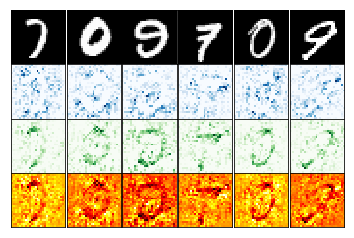

In [6]:

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())

    saver = tf.train.Saver()

    # ConvAutoencoder-OneclassSVM
    t0 = time.time()
    cae1svm.fit(sess, x_train, epochs_1=89, epochs_2=0, verbose=True, validation_data=x_train, validation_label=y_train)
    print('Train time:', time.time() - t0)

    
    t0 = time.time()
    out_y = cae1svm.predict(sess, x_test)
    print('Test time:', time.time() - t0)

    pprint(metrics(y_test, out_y))
    
    normal = x_test[np.where(y_test == 1)]
    anomalies = x_test[np.where(y_test == -1)]
    
    gs = matplotlib.gridspec.GridSpec(4, 6)
    gs.update(wspace=0, hspace=0)
    i = 0
    for n in [0, 5, 12, 14, 20, 33]:
        a = anomalies[n]
        g = sess.run(cae1svm.gradient, {data_input: [anomalies[n]]})
        g = np.reshape(g, (784, len(g)))

        splt = plt.subplot(gs[i])
        splt.imshow(np.reshape(anomalies[n], (28, 28)), cmap='gray')
        splt.set_xticks([])
        splt.set_yticks([])
        
        splt = plt.subplot(gs[i+6])
        splt.imshow(np.maximum(0, np.reshape(g, (28, 28))), cmap='Blues')
        splt.set_xticks([])
        splt.set_yticks([])

        splt = plt.subplot(gs[i+12])
        splt.imshow(np.maximum(0, -np.reshape(g, (28, 28))), cmap='Greens')
        splt.set_xticks([])
        splt.set_yticks([])
        
        splt = plt.subplot(gs[i+18])
        splt.imshow(np.reshape(g, (28, 28)), cmap='hot')
        splt.set_xticks([])
        splt.set_yticks([])
        
        i += 1
        
    plt.show()